In [3]:
%autosave 180
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

from sklearn.model_selection import train_test_split


Autosaving every 180 seconds


In [4]:
collision = pd.read_csv('Toronto Police Cyclists Data.csv', na_values=' ')
#collision.replace(u'\xa0', np.nan, regex=True, inplace=True)
collision

collision.shape


(1341, 57)

In [5]:
# percentage missing values
#toronto_collision.info()

collision_missing = collision.isna()
collision_num_missing = collision_missing.sum()
collision_num_missing

a = collision_num_missing/len(collision)

b = a.sort_values()
b
print(b)
c = b.loc['X':'ACCLOC']
print(c)
len(c)

d = c.index

d
len(d)

X             0.000000
Hood_ID       0.000000
Division      0.000000
CYCLIST       0.000000
FATAL_NO      0.000000
INVAGE        0.000000
INVTYPE       0.000000
IMPACTYPE     0.000000
ACCLASS       0.000000
RDSFCOND      0.000000
LIGHT         0.000000
VISIBILITY    0.000000
TRAFFCTL      0.000000
LOCCOORD      0.000000
ObjectId      0.000000
LATITUDE      0.000000
Y             0.000000
District      0.000000
ROAD_CLASS    0.000000
Index_        0.000000
ACCNUM        0.000000
STREET1       0.000000
Hour          0.000000
TIME          0.000000
DATE          0.000000
LONGITUDE     0.000000
YEAR          0.000000
VEHTYPE       0.068606
INJURY        0.082028
STREET2       0.088740
INITDIR       0.145414
MANOEUVER     0.146905
AUTOMOBILE    0.152125
ACCLOC        0.279642
DRIVACT       0.569724
DRIVCOND      0.569724
CYCACT        0.592095
CYCCOND       0.592841
CYCLISTYPE    0.596570
AG_DRIV       0.641312
PASSENGER     0.859060
OFFSET        0.862043
TRUCK         0.936614
TRSN_CITY_ 

34

In [6]:
e = []
f = []
for i in d:
    e.append(len(collision[i].unique().tolist()))

print(d)
print(d.shape)
print(e)
print(len(e))

g = pd.DataFrame(e,d)

h = g.drop(['CYCLIST','ACCLASS', 'RDSFCOND', 'LOCCOORD', 'District','AUTOMOBILE'])
print(h)

Index(['X', 'Hood_ID', 'Division', 'CYCLIST', 'FATAL_NO', 'INVAGE', 'INVTYPE',
       'IMPACTYPE', 'ACCLASS', 'RDSFCOND', 'LIGHT', 'VISIBILITY', 'TRAFFCTL',
       'LOCCOORD', 'ObjectId', 'LATITUDE', 'Y', 'District', 'ROAD_CLASS',
       'Index_', 'ACCNUM', 'STREET1', 'Hour', 'TIME', 'DATE', 'LONGITUDE',
       'YEAR', 'VEHTYPE', 'INJURY', 'STREET2', 'INITDIR', 'MANOEUVER',
       'AUTOMOBILE', 'ACCLOC'],
      dtype='object')
(34,)
[537, 120, 39, 1, 21, 20, 12, 9, 2, 4, 8, 5, 6, 2, 1341, 520, 520, 4, 5, 1341, 569, 335, 24, 393, 511, 537, 11, 21, 6, 415, 6, 16, 2, 6]
34
               0
X            537
Hood_ID      120
Division      39
FATAL_NO      21
INVAGE        20
INVTYPE       12
IMPACTYPE      9
LIGHT          8
VISIBILITY     5
TRAFFCTL       6
ObjectId    1341
LATITUDE     520
Y            520
ROAD_CLASS     5
Index_      1341
ACCNUM       569
STREET1      335
Hour          24
TIME         393
DATE         511
LONGITUDE    537
YEAR          11
VEHTYPE       21
INJURY         

In [7]:
j = collision[['X', 'Y', 'Division', 'INVAGE', 'INVTYPE',
       'IMPACTYPE', 'ACCLASS', 'RDSFCOND', 'LIGHT', 'VISIBILITY', 'TRAFFCTL',
       'LOCCOORD', 'District', 'ROAD_CLASS',
        'STREET1', 'STREET2', 'Hour', 'DATE',
       'YEAR', 'VEHTYPE', 'INITDIR', 'MANOEUVER'
       ]]

j



,X,Y,Division,INVAGE,INVTYPE,IMPACTYPE,ACCLASS,RDSFCOND,LIGHT,VISIBILITY,...,District,ROAD_CLASS,STREET1,STREET2,Hour,DATE,YEAR,VEHTYPE,INITDIR,MANOEUVER
0,-79.476772,43.703021,12,85 to 89,Driver,Cyclist Collisions,Non-Fatal Injury,Dry,Daylight,Clear,...,Etobicoke York,Major Arterial,KEELE ST,FLAMBOROUGH DR,14,2016-10-03T04:00:00.000Z,2016,"Automobile, Station Wagon",North,Turning Left
1,-79.476772,43.703021,12,45 to 49,Cyclist,Cyclist Collisions,Non-Fatal Injury,Dry,Daylight,Clear,...,Etobicoke York,Major Arterial,KEELE ST,FLAMBOROUGH DR,14,2016-10-03T04:00:00.000Z,2016,Bicycle,South,Going Ahead
2,-79.361690,43.670245,51,30 to 34,Driver,Cyclist Collisions,Non-Fatal Injury,Dry,Daylight,Clear,...,Toronto and East York,Major Arterial,ROSEDALE VALLEY RD,BAYVIEW S ROSEDALE VL RAMP,14,2012-05-24T04:00:00.000Z,2012,"Automobile, Station Wagon",East,Changing Lanes
3,-79.361690,43.670245,51,60 to 64,Cyclist,Cyclist Collisions,Non-Fatal Injury,Dry,Daylight,Clear,...,Toronto and East York,Major Arterial,ROSEDALE VALLEY RD,BAYVIEW S ROSEDALE VL RAMP,14,2012-05-24T04:00:00.000Z,2012,Bicycle,East,Merging
4,-79.267790,43.707445,41,55 to 59,Cyclist,Cyclist Collisions,Non-Fatal Injury,Dry,Daylight,Clear,...,Scarborough,Minor Arterial,DANFORTH Rd,BIRCHMOUNT Rd,14,2009-11-30T05:00:00.000Z,2009,Bicycle,North,Going Ahead
5,-79.397790,43.648445,14,20 to 24,Driver,Cyclist Collisions,Non-Fatal Injury,Dry,Daylight,Clear,...,Toronto and East York,Major Arterial,QUEEN St W,CAMERON St,14,2011-12-20T05:00:00.000Z,2011,"Automobile, Station Wagon",East,Parked
6,-79.397790,43.648445,14,35 to 39,Cyclist,Cyclist Collisions,Non-Fatal Injury,Dry,Daylight,Clear,...,Toronto and East York,Major Arterial,QUEEN St W,CAMERON St,14,2011-12-20T05:00:00.000Z,2011,Bicycle,East,Going Ahead
7,-79.405290,43.643345,14,50 to 54,Driver,Cyclist Collisions,Non-Fatal Injury,Wet,Daylight,Clear,...,Toronto and East York,Major Arterial,KING St W,TECUMSETH St,14,2012-02-14T05:00:00.000Z,2012,"Automobile, Station Wagon",West,Turning Left
8,-79.405290,43.643345,14,20 to 24,Cyclist,Cyclist Collisions,Non-Fatal Injury,Wet,Daylight,Clear,...,Toronto and East York,Major Arterial,KING St W,TECUMSETH St,14,2012-02-14T05:00:00.000Z,2012,Bicycle,East,Going Ahead
9,-79.454875,43.688647,13,30 to 34,Cyclist,Cyclist Collisions,Non-Fatal Injury,Dry,Daylight,Clear,...,Toronto and East York,Local,CHUDLEIGH RD,HARVIE AVE,14,2018-08-12T04:00:00.000Z,2018,Bicycle,North,Going Ahead


Text(0.5, 1.0, 'Number of collisions happened in each division')

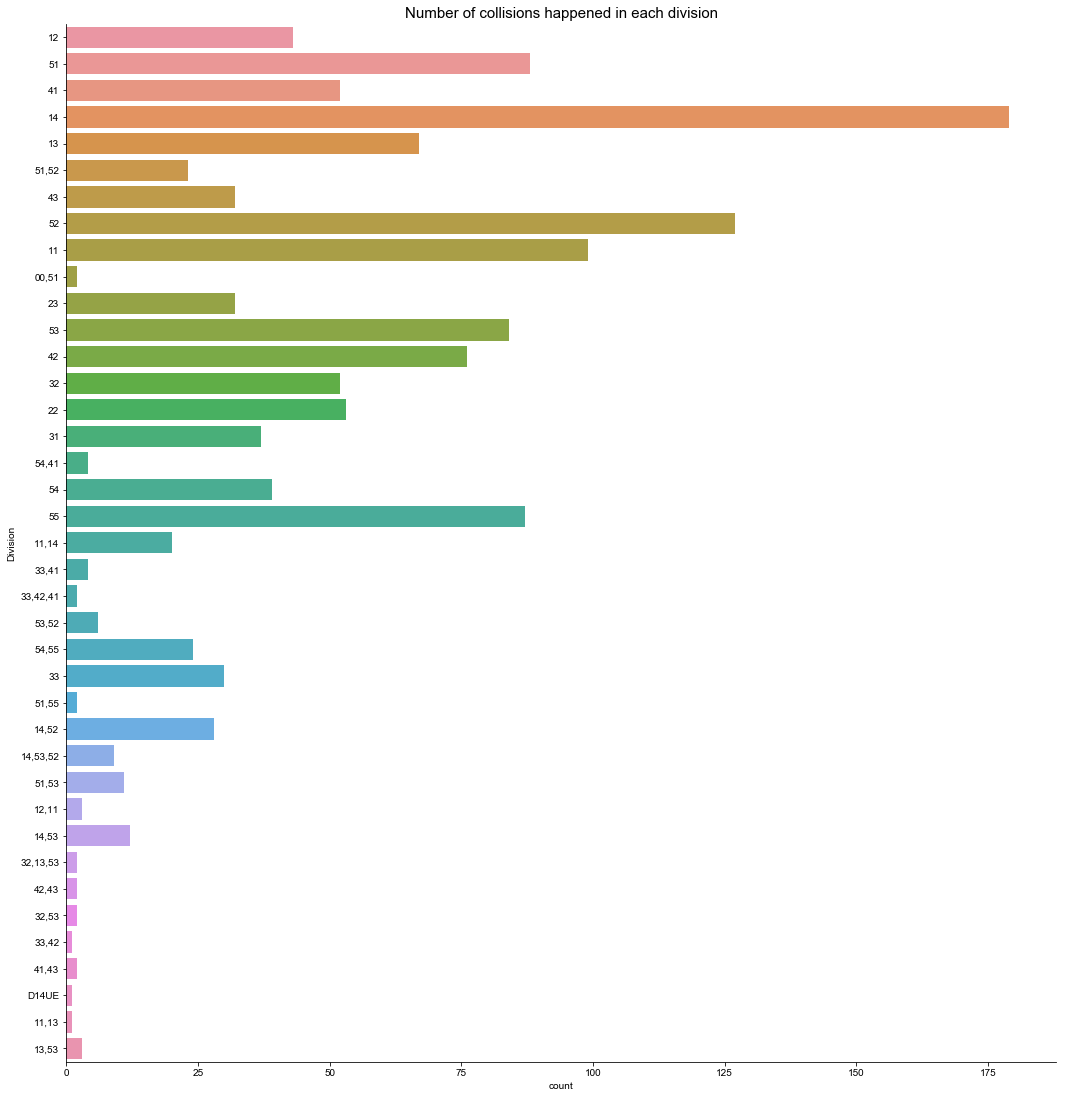

In [8]:
#j.to_csv('group')

k=sns.catplot(y='Division', kind = "count", data = j, height = 15)

#k.axes.set_title("Number of collisions happend for each division",fontsize=20)
sns.set(rc={'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.labelsize':15})
plt.title('Number of collisions happened in each division', fontsize=15)

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


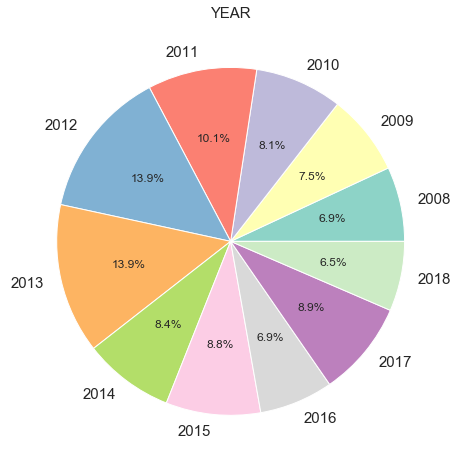

In [9]:

l = j['YEAR']
m = l.value_counts(sort=False)
n = l.unique()
n = sorted(set(n))
print(n)

cs=cm.Set3(np.arange(11)/11.)
plt.figure(figsize=(8,8))
plt.pie(m, autopct='%1.1f%%', labels = n, colors=cs)
plt.title("YEAR", fontsize = 15)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

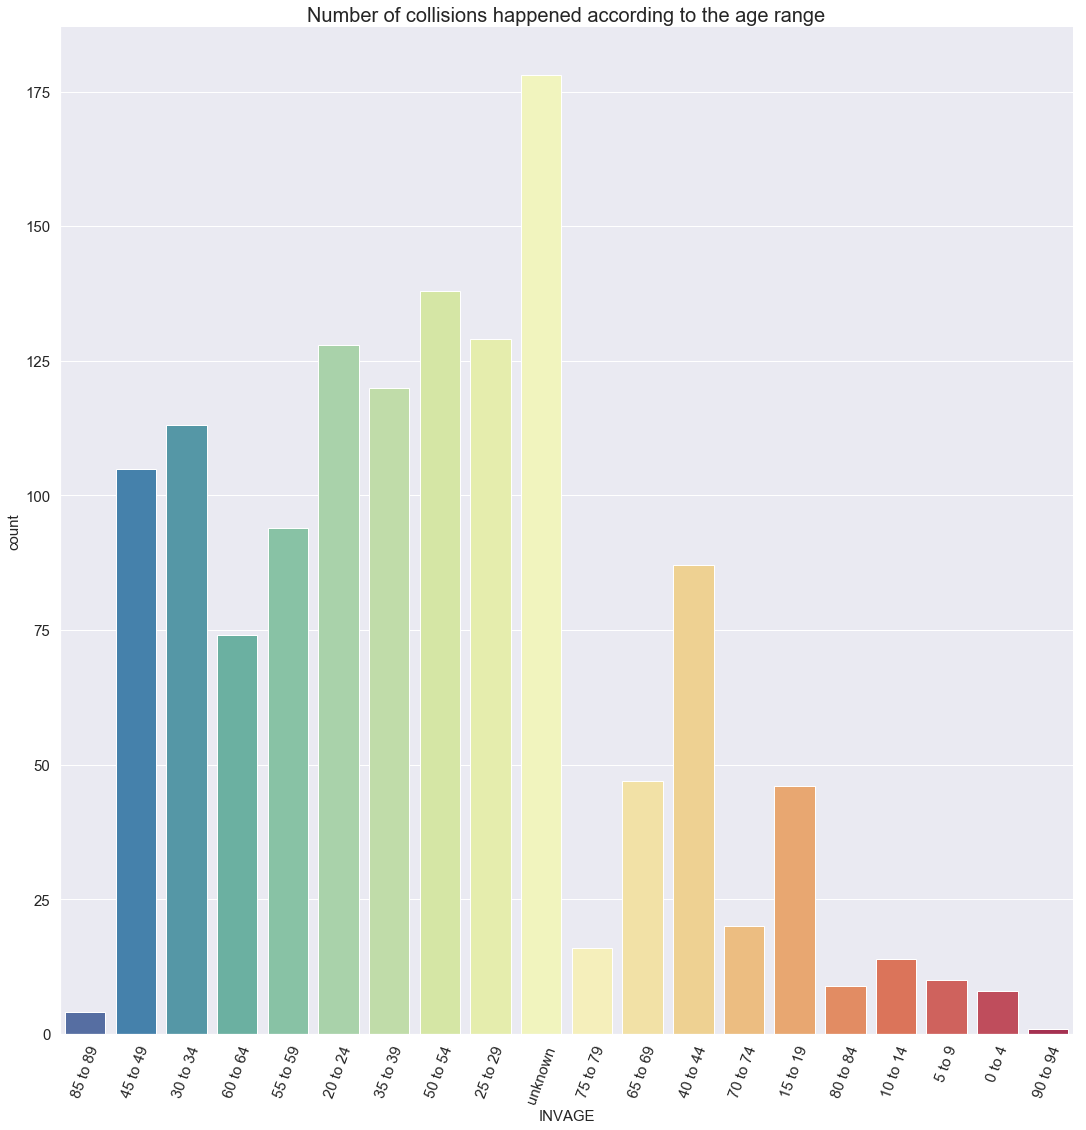

In [11]:
o=sns.catplot(x='INVAGE', kind = "count", data = j, height = 15, palette='Spectral_r')
sns.set(rc={'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.labelsize':15})
plt.title('Number of collisions happened according to the age range', fontsize=20)

plt.xticks(rotation=70)

Text(0.5, 1.0, 'Number of collisions happened according to the light')

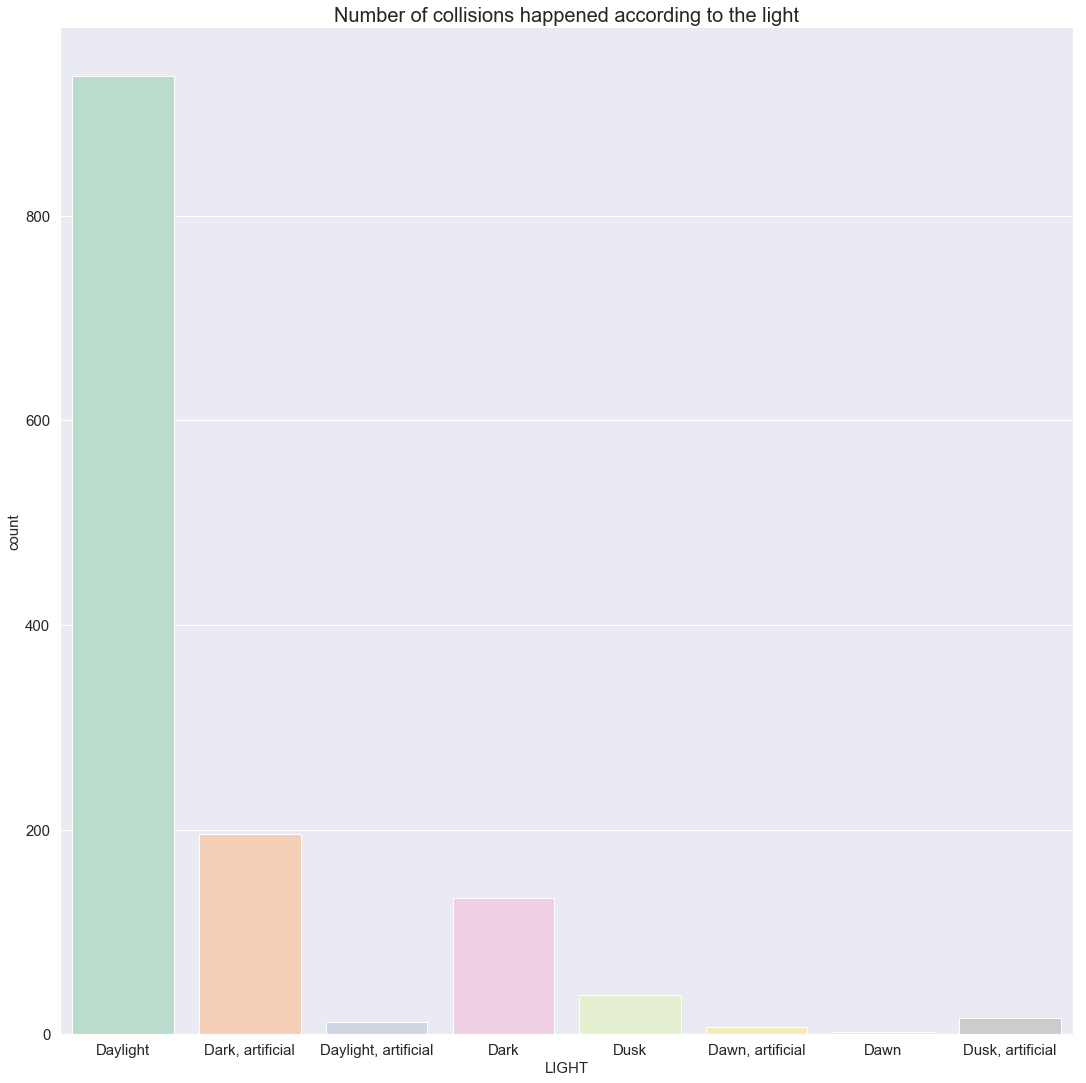

In [24]:
p=sns.catplot(x='LIGHT', kind = "count", data = j, height = 15, palette='Pastel2')
sns.set(rc={'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.labelsize':15})
plt.title('Number of collisions happened according to the light', fontsize=20)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

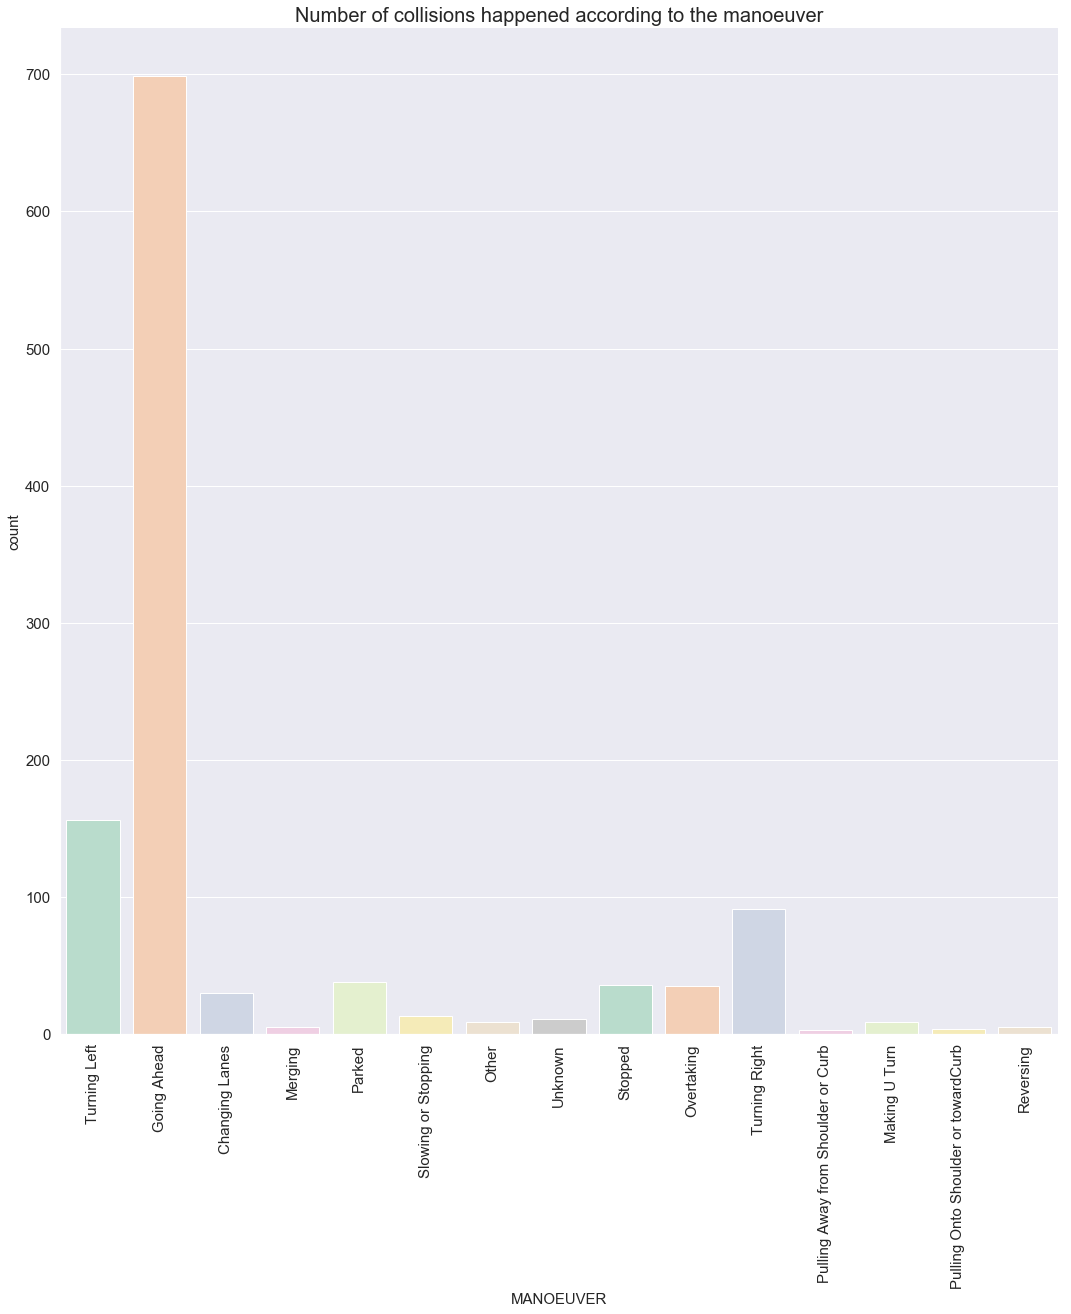

In [20]:
p=sns.catplot(x='MANOEUVER', kind = "count", data = j, height = 15, palette='Pastel2')
sns.set(rc={'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.labelsize':15})
plt.title('Number of collisions happened according to the manoeuver', fontsize=20)

plt.xticks(rotation=90)